In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
from private.s3_aws import access_key, secret_access_key

## File upload

In [4]:
df_corr = pd.read_csv(f"s3://cleandatagrupo07/correlation_var.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },
)

## KNN Reressor model

In [5]:
X=df_corr.drop(['Price_AllHomes','Unique_City_ID','Date','City','County','State'],axis=1)
y=df_corr['Price_AllHomes']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [7]:
knn=KNeighborsRegressor(n_neighbors=100)

In [8]:
knn.fit(x_train.values,y_train.values)

KNeighborsRegressor(n_neighbors=100)

In [9]:
y_pred=knn.predict(x_test.values)

In [13]:
y_train_pred = knn.predict(x_train) # subset de entrenamiento
y_test_pred = knn.predict(x_test) #subset de testeo

c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


## Model evaluation

In [10]:
r2_score(y_test,y_pred)

0.9225143284723827

In [11]:
accuracy=knn.score(x_test.values,y_test.values)
accuracy

0.9225143284723827

Root mean square error in Train: 40045.899216954254
Root mean square error in Test: 46388.63990156541


C:\Users\fotot\AppData\Local\Temp\ipykernel_12384\2599048515.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
C:\Users\fotot\AppData\Local\Temp\ipykernel_12384\2599048515.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

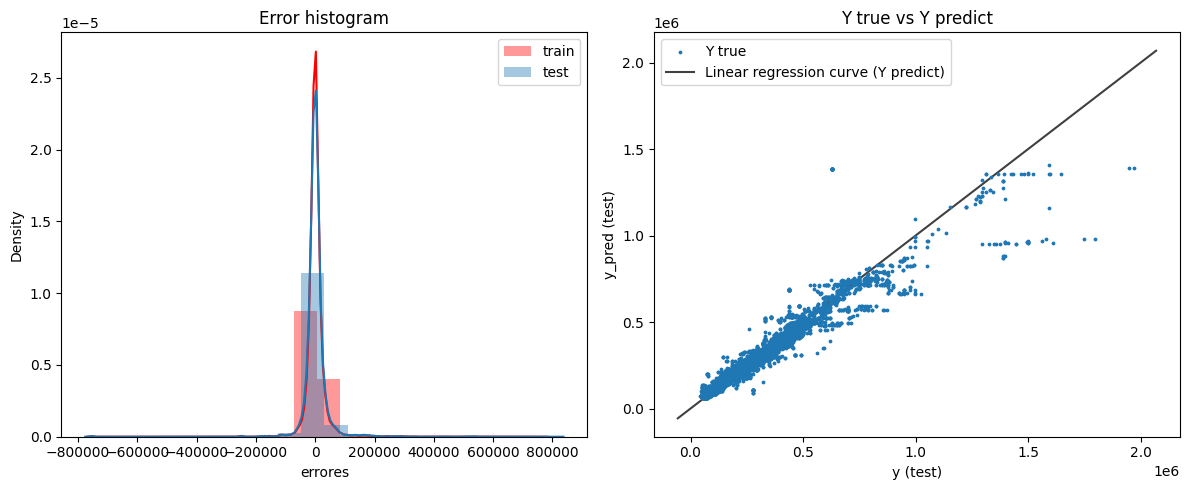

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Root mean square error in Train: {rmse_train}')
print(f'Root mean square error in Test: {rmse_test}')

plt.figure(figsize = (12,5))

# In this subplot, we plot the error histograms for the training and testing subsets.
plt.subplot(1,2,1)
plt.title('Error histogram')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# In this subplot, we plot the light blue points that represent the actual Y values ​​and the black curve that represents the regression function that created our ML model.
ax = plt.subplot(1,2,2)
plt.title('Y true vs Y predict')
ax.scatter(y_test,y_test_pred, s =3, label = 'Y true')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Linear regression curve (Y predict)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()